In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
data = pd.read_csv(url, sep=';')

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# print a list of unique values per column
numberOfUniqueValues = {key: len(np.unique(data[key])) for key in data.keys()}
numberOfUniqueValues

{'fixed acidity': 96,
 'volatile acidity': 143,
 'citric acid': 80,
 'residual sugar': 91,
 'chlorides': 153,
 'free sulfur dioxide': 60,
 'total sulfur dioxide': 144,
 'density': 436,
 'pH': 89,
 'sulphates': 96,
 'alcohol': 65,
 'quality': 6}

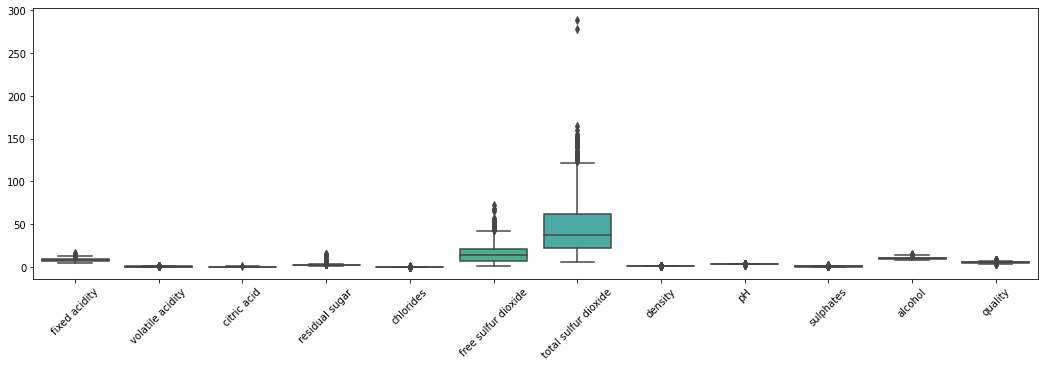

In [6]:
fig,ax = plt.subplots(1,figsize=(18,5))
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=data.keys(), rotation=45)
plt.show()

In [7]:
data = data[ data['total sulfur dioxide']<200 ]

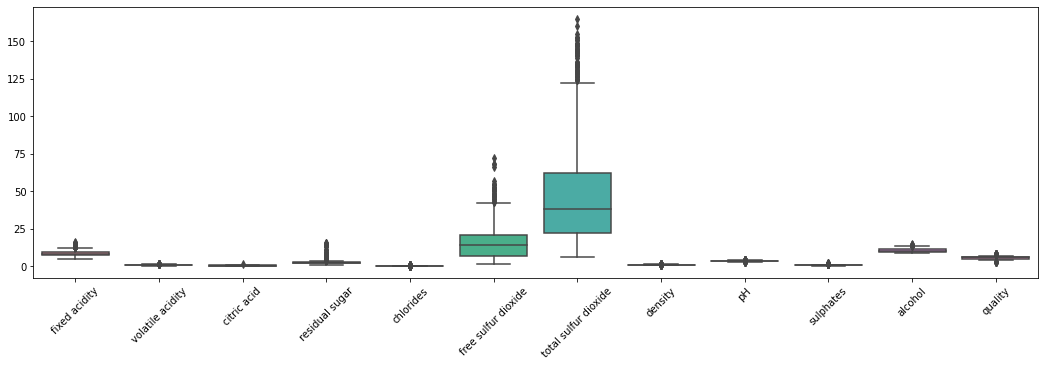

In [8]:
fig,ax = plt.subplots(1,figsize=(18,5))
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=data.keys(), rotation=45)
plt.show()

In [9]:
# visual data exploration

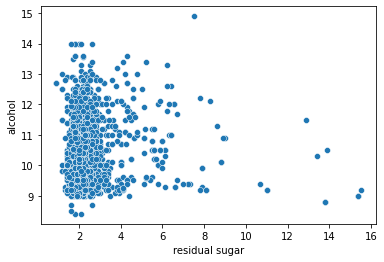

In [10]:
sns.scatterplot(x=data['residual sugar'],y=data['alcohol'])
plt.show()

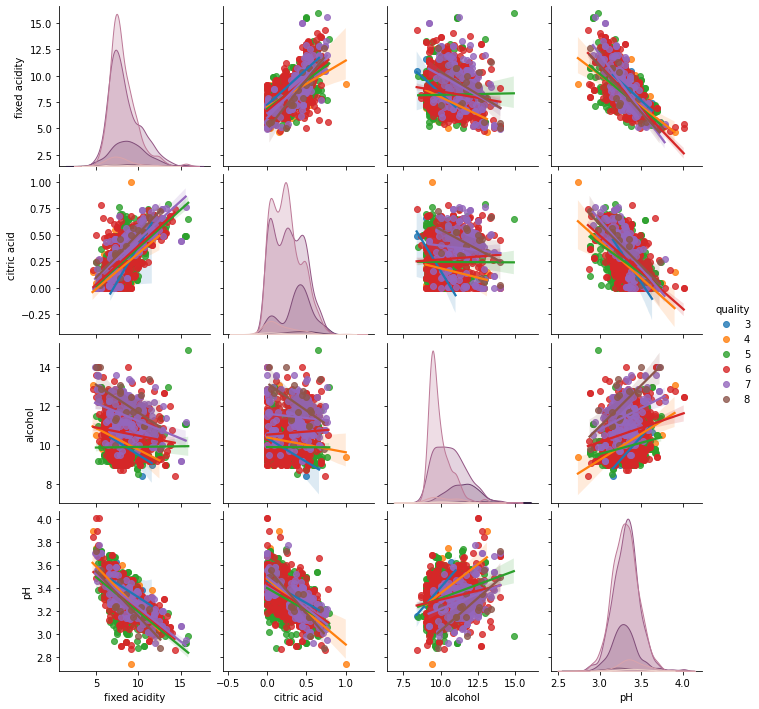

In [11]:
columnsToPlot = ['fixed acidity','citric acid', 'alcohol', 'pH', 'quality']
sns.pairplot(data[columnsToPlot],kind='reg',hue='quality')
plt.show()

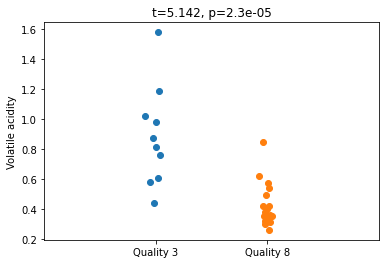

In [12]:
x = data['volatile acidity'][data['quality']==3]
y = data['volatile acidity'][data['quality']==8]

ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,'o',np.random.randn(len(y))/30+1,y,'o')
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Quality 3', 'Quality 8'])
plt.ylabel('Volatile acidity')
plt.title(f't={round(ttest[0], 3)}, p={round(ttest[1], 6)}')
plt.show()

In [13]:
qualityCounts = np.zeros(6)
for i in range(3,9):
  qualityCounts[i - 3] = len(data[data['quality']==i])

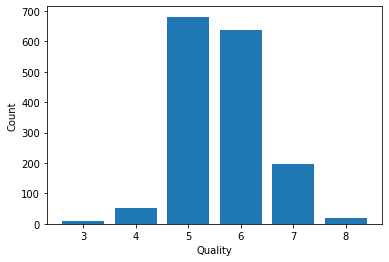

In [14]:
plt.bar(range(3,9), qualityCounts)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

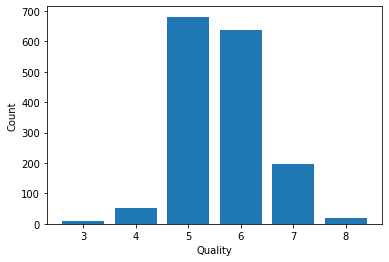

In [15]:
counts = data['quality'].value_counts() # rövidebb megoldás
plt.bar(counts.keys(), counts)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

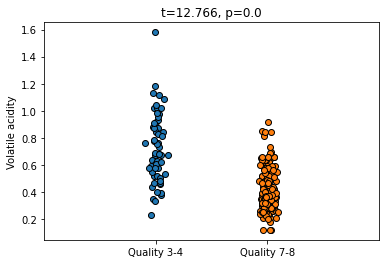

In [16]:
x = data['volatile acidity'][data['quality'] < 5]
y = data['volatile acidity'][data['quality'] > 6]

ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,'o',np.random.randn(len(y))/30+1,y,'o', markeredgecolor='k')
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Quality 3-4', 'Quality 7-8'])
plt.ylabel('Volatile acidity')
plt.title(f't={round(ttest[0], 3)}, p={round(ttest[1], 6)}')
plt.show()

In [17]:
depVar  = data['quality']
indVars = data.drop(labels='quality', axis=1)

indVars = sm.add_constant(indVars)
model = sm.OLS(depVar, indVars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.30e-145
Time:                        13:35:17   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


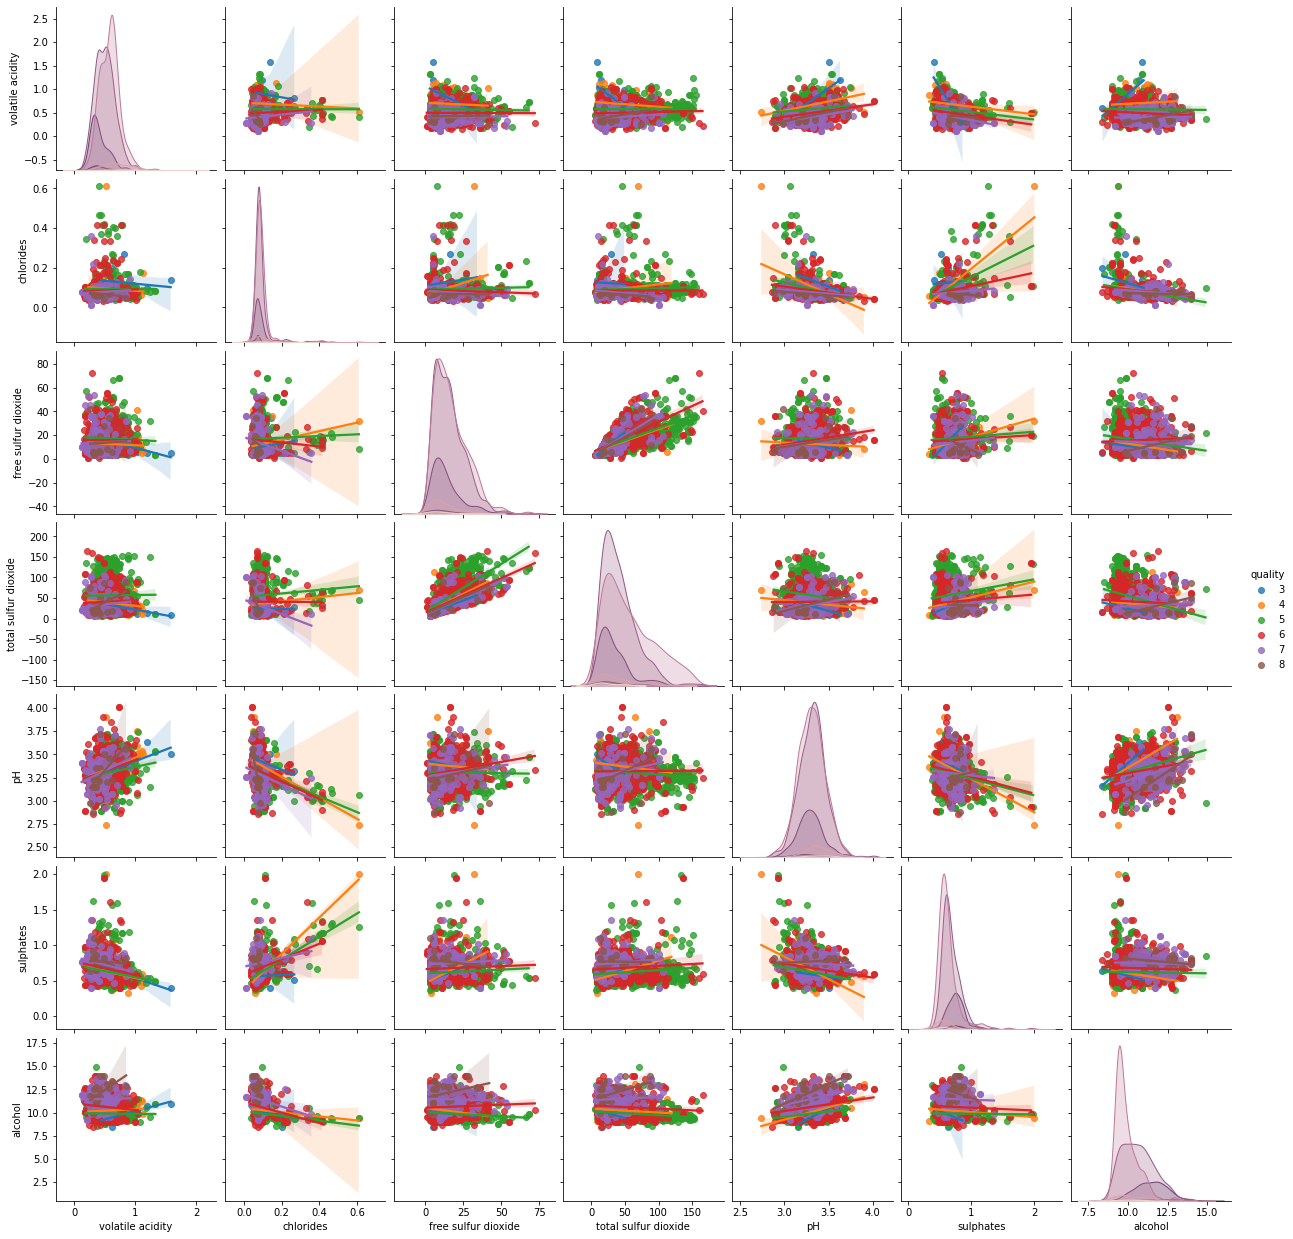

In [18]:
significantColumns = list(model.pvalues[model.pvalues<.05].keys())
significantColumns.append('quality')
sns.pairplot(data[significantColumns], kind='reg', hue='quality')

In [19]:
# Logistic regression

In [24]:
averageQuality = np.mean(data['quality'])
data['binaryQuality'] = data['quality'] > averageQuality

In [31]:
independentVariables = [key for key in data.keys() if key not in ['quality', 'binaryQuality']]

In [33]:
model = sm.Logit(data['binaryQuality'], data[independentVariables])
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


In [35]:
predictors = list(results.pvalues[results.pvalues<.05].keys())
predictors

['volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']